In [4]:
!pip install japanize-matplotlib



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 20.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=8226955a2e59f97c0fdf9a4eb1f43f3730bd887a2ffba83eb3261284b552cdd9
  Stored in directory: /root/.cache/pip/wheels/61/7a/6b/df1f79be9c59862525070e157e62b08eab8ece27c1b68fbb94
Successfully built japanize-matplotlib


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

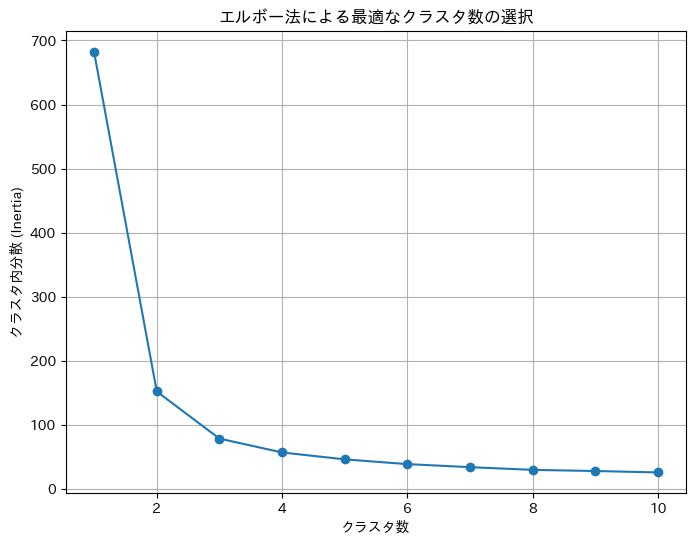

最適なクラスタ数 (K): 3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
#実践13-1
'''K-Meansクラスタリングによる品種の分類
irisデータセットをロードする
説明変数(4つの特徴量)を抽出する
K-Means法によりクラスタリングを行う
エルボー法で最適なクラスタ数を決定する
クラスタリング結果と実際の品種ラベルを比較し、正解率を計算する(教師なし学習なので通常は実施しないが、参考のために実施する)'''



import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import japanize_matplotlib
# Irisデータセットの読み込み
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# 説明変数（4つの特徴量）の抽出
X_features = X[:, :4]

# K-Meansクラスタリング
# クラスタ数Kを1から10まで試す
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_features)
    inertia.append(kmeans.inertia_)

# エルボー法による最適なKの決定
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('クラスタ数')
plt.ylabel('クラスタ内分散 (Inertia)')
plt.title('エルボー法による最適なクラスタ数の選択')
plt.grid(True)
plt.show()

# K=3で再度K-Meansクラスタリングを実行
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(X_features)
predicted_labels = kmeans.labels_



print(f"最適なクラスタ数 (K): {optimal_k}")

In [9]:
#K-Means以外のクラスタリング手法による品種の分類
'''13-1をK-Means以外の手法で実施する(階層的クラスタリング・DBSCAN・etc)
クラスタリング結果と実際の品種ラベルを比較し、正解率を計算する'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# 凝集型階層的クラスタリング（Agglomerative Clustering）
model = AgglomerativeClustering(n_clusters=3)
predicted_labels = model.fit_predict(X)



In [10]:
#実践13-3
'''from sklearn.datasets import load_wine
wine = load_wine()
X, y = wine.data, wine.target
上記のデータを使ってクラスタリングを実施してください。
特徴量のスケーリング等に注意して実施してください。 本データは実際には正解データ(ラベル数)が付与されています。
クラスタリングである程度分類できるか正解率を計算してください。'''


import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

wine = load_wine()
X, y = wine.data, wine.target
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k = 3
kmeans = KMeans(n_clusters=k, random_state=0)
predicted_labels = kmeans.fit_predict(X_scaled)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
